In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [13]:
# from google.colab import drive
# drive.mount('/content/drive')

In [14]:
# !unzip '/content/drive/MyDrive/Colab Notebooks/sf-crime.zip'

In [18]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sampleSubmission.csv')

#test_ids = test['PassengerId']


train

Dates                Category  \
0       2015-05-13 23:53:00                WARRANTS   
1       2015-05-13 23:53:00          OTHER OFFENSES   
2       2015-05-13 23:33:00          OTHER OFFENSES   
3       2015-05-13 23:30:00           LARCENY/THEFT   
4       2015-05-13 23:30:00           LARCENY/THEFT   
...                     ...                     ...   
878044  2003-01-06 00:15:00                 ROBBERY   
878045  2003-01-06 00:01:00           LARCENY/THEFT   
878046  2003-01-06 00:01:00           LARCENY/THEFT   
878047  2003-01-06 00:01:00               VANDALISM   
878048  2003-01-06 00:01:00  FORGERY/COUNTERFEITING   

                                         Descript  DayOfWeek PdDistrict  \
0                                  WARRANT ARREST  Wednesday   NORTHERN   
1                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
3                    GRAND THEFT FROM LOCKED AUTO  Wednesday   NORTHERN   
4                    GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   
...                                           ...        ...        ...   
878044           ROBBERY ON THE STREET WITH A GUN     Monday    TARAVAL   
878045               GRAND THEFT FROM LOCKED AUTO     Monday  INGLESIDE   
878046               GRAND THEFT FROM LOCKED AUTO     Monday   SOUTHERN   
878047  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES     Monday   SOUTHERN   
878048                   CHECKS, FORGERY (FELONY)     Monday    BAYVIEW   

            Resolution                     Address           X          Y  
0       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599  
1       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599  
2       ARREST, BOOKED   VANNESS AV / GREENWICH ST -122.424363  37.800414  
3                 NONE    1500 Block of LOMBARD ST -122.426995  37.800873  
4                 NONE   100 Block of BRODERICK ST -122.438738  37.771541  
...                ...                         ...         ...        ...  
878044            NONE  FARALLONES ST / CAPITOL AV -122.459033  37.714056  
878045            NONE        600 Block of EDNA ST -122.447364  37.731948  
878046            NONE          5TH ST / FOLSOM ST -122.403390  37.780266  
878047            NONE        TOWNSEND ST / 2ND ST -122.390531  37.780607  
878048            NONE    1800 Block of NEWCOMB AV -122.394926  37.738212  

[878049 rows x 9 columns]

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          884262 non-null  int64  
 1   Dates       884262 non-null  object 
 2   DayOfWeek   884262 non-null  object 
 3   PdDistrict  884262 non-null  object 
 4   Address     884262 non-null  object 
 5   X           884262 non-null  float64
 6   Y           884262 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 47.2+ MB


In [22]:
# combine the two dataframes for feature engineering (only keep columns that are in both dataframes and also drop the address column)

combined = pd.concat([train.drop(['Category', 'Descript', 'Resolution', 'Address'], axis=1), test.drop(['Id', 'Address'], axis=1)], axis=0)
combined

Dates  DayOfWeek PdDistrict           X          Y
0       2015-05-13 23:53:00  Wednesday   NORTHERN -122.425892  37.774599
1       2015-05-13 23:53:00  Wednesday   NORTHERN -122.425892  37.774599
2       2015-05-13 23:33:00  Wednesday   NORTHERN -122.424363  37.800414
3       2015-05-13 23:30:00  Wednesday   NORTHERN -122.426995  37.800873
4       2015-05-13 23:30:00  Wednesday       PARK -122.438738  37.771541
...                     ...        ...        ...         ...        ...
884257  2003-01-01 00:01:00  Wednesday    MISSION -122.408983  37.751987
884258  2003-01-01 00:01:00  Wednesday   NORTHERN -122.425342  37.792681
884259  2003-01-01 00:01:00  Wednesday  INGLESIDE -122.445418  37.712075
884260  2003-01-01 00:01:00  Wednesday    BAYVIEW -122.387394  37.739479
884261  2003-01-01 00:01:00  Wednesday    TARAVAL -122.489714  37.733950

[1762311 rows x 5 columns]

In [ ]:
# Make a list of crimes, then sort alphabetically
crimes = list(train['Category'].unique())
crimes.sort()
crimes


In [29]:
# label the crime category

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train['Category'] = encoder.fit_transform(train['Category'])
y_train = encoder.fit_transform(train['Category'])

train

Dates  Category  \
0       2015-05-13 23:53:00        37   
1       2015-05-13 23:53:00        21   
2       2015-05-13 23:33:00        21   
3       2015-05-13 23:30:00        16   
4       2015-05-13 23:30:00        16   
...                     ...       ...   
878044  2003-01-06 00:15:00        25   
878045  2003-01-06 00:01:00        16   
878046  2003-01-06 00:01:00        16   
878047  2003-01-06 00:01:00        35   
878048  2003-01-06 00:01:00        12   

                                         Descript  DayOfWeek PdDistrict  \
0                                  WARRANT ARREST  Wednesday   NORTHERN   
1                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
3                    GRAND THEFT FROM LOCKED AUTO  Wednesday   NORTHERN   
4                    GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   
...                                           ...        ...        ...   
878044           ROBBERY ON THE STREET WITH A GUN     Monday    TARAVAL   
878045               GRAND THEFT FROM LOCKED AUTO     Monday  INGLESIDE   
878046               GRAND THEFT FROM LOCKED AUTO     Monday   SOUTHERN   
878047  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES     Monday   SOUTHERN   
878048                   CHECKS, FORGERY (FELONY)     Monday    BAYVIEW   

            Resolution                     Address           X          Y  
0       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599  
1       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599  
2       ARREST, BOOKED   VANNESS AV / GREENWICH ST -122.424363  37.800414  
3                 NONE    1500 Block of LOMBARD ST -122.426995  37.800873  
4                 NONE   100 Block of BRODERICK ST -122.438738  37.771541  
...                ...                         ...         ...        ...  
878044            NONE  FARALLONES ST / CAPITOL AV -122.459033  37.714056  
878045            NONE        600 Block of EDNA ST -122.447364  37.731948  
878046            NONE          5TH ST / FOLSOM ST -122.403390  37.780266  
878047            NONE        TOWNSEND ST / 2ND ST -122.390531  37.780607  
878048            NONE    1800 Block of NEWCOMB AV -122.394926  37.738212  

[878049 rows x 9 columns]

In [32]:
# convert the dates column to datetime format
combined['Dates'] = pd.to_datetime(combined['Dates'])

# create columns with the year, month, day of the month, day of the week and hour from the datetime column
combined['Year'] = combined['Dates'].dt.year
combined['Month'] = combined['Dates'].dt.month
combined['Day'] = combined['Dates'].dt.day
combined['Weekday'] = combined['Dates'].dt.weekday
combined['Hour'] = combined['Dates'].dt.hour

combined

Dates  DayOfWeek PdDistrict           X          Y  Year  \
0      2015-05-13 23:53:00  Wednesday   NORTHERN -122.425892  37.774599  2015   
1      2015-05-13 23:53:00  Wednesday   NORTHERN -122.425892  37.774599  2015   
2      2015-05-13 23:33:00  Wednesday   NORTHERN -122.424363  37.800414  2015   
3      2015-05-13 23:30:00  Wednesday   NORTHERN -122.426995  37.800873  2015   
4      2015-05-13 23:30:00  Wednesday       PARK -122.438738  37.771541  2015   
...                    ...        ...        ...         ...        ...   ...   
884257 2003-01-01 00:01:00  Wednesday    MISSION -122.408983  37.751987  2003   
884258 2003-01-01 00:01:00  Wednesday   NORTHERN -122.425342  37.792681  2003   
884259 2003-01-01 00:01:00  Wednesday  INGLESIDE -122.445418  37.712075  2003   
884260 2003-01-01 00:01:00  Wednesday    BAYVIEW -122.387394  37.739479  2003   
884261 2003-01-01 00:01:00  Wednesday    TARAVAL -122.489714  37.733950  2003   

        Month  Day  Weekday  Hour  
0           5   13        2    23  
1           5   13        2    23  
2           5   13        2    23  
3           5   13        2    23  
4           5   13        2    23  
...       ...  ...      ...   ...  
884257      1    1        2     0  
884258      1    1        2     0  
884259      1    1        2     0  
884260      1    1        2     0  
884261      1    1        2     0  

[1762311 rows x 10 columns]

<Axes: xlabel='DayOfWeek'>

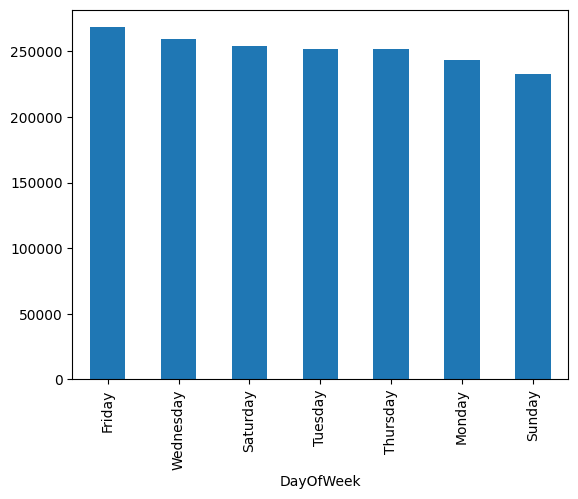

In [33]:
combined["DayOfWeek"].value_counts().plot(kind='bar')

In [34]:
combined = pd.concat([combined, pd.get_dummies(combined['PdDistrict'])], axis=1)
combined

Dates  DayOfWeek PdDistrict           X          Y  Year  \
0      2015-05-13 23:53:00  Wednesday   NORTHERN -122.425892  37.774599  2015   
1      2015-05-13 23:53:00  Wednesday   NORTHERN -122.425892  37.774599  2015   
2      2015-05-13 23:33:00  Wednesday   NORTHERN -122.424363  37.800414  2015   
3      2015-05-13 23:30:00  Wednesday   NORTHERN -122.426995  37.800873  2015   
4      2015-05-13 23:30:00  Wednesday       PARK -122.438738  37.771541  2015   
...                    ...        ...        ...         ...        ...   ...   
884257 2003-01-01 00:01:00  Wednesday    MISSION -122.408983  37.751987  2003   
884258 2003-01-01 00:01:00  Wednesday   NORTHERN -122.425342  37.792681  2003   
884259 2003-01-01 00:01:00  Wednesday  INGLESIDE -122.445418  37.712075  2003   
884260 2003-01-01 00:01:00  Wednesday    BAYVIEW -122.387394  37.739479  2003   
884261 2003-01-01 00:01:00  Wednesday    TARAVAL -122.489714  37.733950  2003   

        Month  Day  Weekday  Hour  BAYVIEW  CENTRAL  INGLESIDE  MISSION  \
0           5   13        2    23    False    False      False    False   
1           5   13        2    23    False    False      False    False   
2           5   13        2    23    False    False      False    False   
3           5   13        2    23    False    False      False    False   
4           5   13        2    23    False    False      False    False   
...       ...  ...      ...   ...      ...      ...        ...      ...   
884257      1    1        2     0    False    False      False     True   
884258      1    1        2     0    False    False      False    False   
884259      1    1        2     0    False    False       True    False   
884260      1    1        2     0     True    False      False    False   
884261      1    1        2     0    False    False      False    False   

        NORTHERN   PARK  RICHMOND  SOUTHERN  TARAVAL  TENDERLOIN  
0           True  False     False     False    False       False  
1           True  False     False     False    False       False  
2           True  False     False     False    False       False  
3           True  False     False     False    False       False  
4          False   True     False     False    False       False  
...          ...    ...       ...       ...      ...         ...  
884257     False  False     False     False    False       False  
884258      True  False     False     False    False       False  
884259     False  False     False     False    False       False  
884260     False  False     False     False    False       False  
884261     False  False     False     False     True       False  

[1762311 rows x 20 columns]

In [35]:
combined.drop(['Dates', 'DayOfWeek', 'PdDistrict'], axis=1, inplace=True)
combined

X          Y  Year  Month  Day  Weekday  Hour  BAYVIEW  \
0      -122.425892  37.774599  2015      5   13        2    23    False   
1      -122.425892  37.774599  2015      5   13        2    23    False   
2      -122.424363  37.800414  2015      5   13        2    23    False   
3      -122.426995  37.800873  2015      5   13        2    23    False   
4      -122.438738  37.771541  2015      5   13        2    23    False   
...            ...        ...   ...    ...  ...      ...   ...      ...   
884257 -122.408983  37.751987  2003      1    1        2     0    False   
884258 -122.425342  37.792681  2003      1    1        2     0    False   
884259 -122.445418  37.712075  2003      1    1        2     0    False   
884260 -122.387394  37.739479  2003      1    1        2     0     True   
884261 -122.489714  37.733950  2003      1    1        2     0    False   

        CENTRAL  INGLESIDE  MISSION  NORTHERN   PARK  RICHMOND  SOUTHERN  \
0         False      False    False      True  False     False     False   
1         False      False    False      True  False     False     False   
2         False      False    False      True  False     False     False   
3         False      False    False      True  False     False     False   
4         False      False    False     False   True     False     False   
...         ...        ...      ...       ...    ...       ...       ...   
884257    False      False     True     False  False     False     False   
884258    False      False    False      True  False     False     False   
884259    False       True    False     False  False     False     False   
884260    False      False    False     False  False     False     False   
884261    False      False    False     False  False     False     False   

        TARAVAL  TENDERLOIN  
0         False       False  
1         False       False  
2         False       False  
3         False       False  
4         False       False  
...         ...         ...  
884257    False       False  
884258    False       False  
884259    False       False  
884260    False       False  
884261     True       False  

[1762311 rows x 17 columns]

In [36]:
# split the formatted test and train data
train_formatted = combined.iloc[:len(train)]
test_formatted = combined.iloc[len(train):]

# Use XGBoost classification
import xgboost as xgb

model = xgb.XGBClassifier(objective='multi:softprob', num_class=len(crimes))
model.fit(train_formatted, y_train)



KeyboardInterrupt: 